<!--COURSE_INFORMATION-->
*This notebook contains course material from [CBE 30338 Chemical Process Control](http://jckantor.github.io/CBE30338/) by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE30338).*
*The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Simulation of an Exothermic CSTR](07.02-Simulation-of-an-Exothermic-CSTR.ipynb) | [Contents](index.ipynb) | [Path Planning for a Simple Car](07.04-Path-Planning-for-a-Simple-Car.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/notebooks/07.03-First-Order-System-in-Pyomo.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# First Order System in Pyomo

## First-Order Differential Equation with Initial Condition

The following cell implements a solution to a first-order linear model in the form

\begin{align}
\tau\frac{dy}{dt} + y & = K u(t) \\
\end{align}

where $\tau$ and $K$ are model parameters, and $u(t)$ is an external process input.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 101
  Number of variables: 101
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024537086486816406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Text(0.5,1,'Response of a linear first-order ODE')

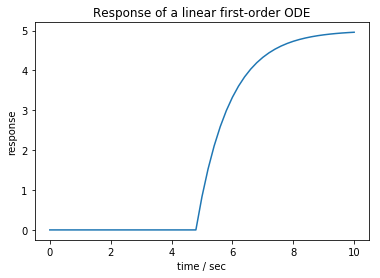

In [5]:
% matplotlib inline
from pyomo.environ import *
from pyomo.dae import *
import matplotlib.pyplot as plt

tf = 10
tau = 1
K = 5

# define u(t)
u = lambda t: 0 if t < 5 else 1

# create a model object
model = ConcreteModel()

# define the independent variable
model.t = ContinuousSet(bounds=(0, tf))

# define the dependent variables
model.y = Var(model.t)
model.dydt = DerivativeVar(model.y)

# fix the initial value of y
model.y[0].fix(0)

# define the differential equation as a constraint
model.ode = Constraint(model.t, 
    rule=lambda model, t: tau*model.dydt[t] + model.y[t] == K*u(t))

# transform dae model to discrete optimization problem
TransformationFactory('dae.finite_difference').apply_to(model, nfe=50, method='BACKWARD')

# solve the model
SolverFactory('ipopt').solve(model).write()

# access elements of a ContinuousSet object
t = [t for t in model.t]

# access elements of a Var object
y = [model.y[t]() for t in model.y]

plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('response')
plt.title('Response of a linear first-order ODE')

<!--NAVIGATION-->
< [Simulation of an Exothermic CSTR](07.02-Simulation-of-an-Exothermic-CSTR.ipynb) | [Contents](index.ipynb) | [Path Planning for a Simple Car](07.04-Path-Planning-for-a-Simple-Car.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/CBE30338/blob/master/notebooks/07.03-First-Order-System-in-Pyomo.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
